Please implement K-means clustering algorithm from scratch.
Please plot each step of K-means as it proceeds
NOTE: Please do not use any package/library including scikit-learn library except NumPy, Pandas, and Matplotlib.
K-means algorithm is a method to automatically cluster similar data examples together. K-means is an iterative procedure
that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest
centroids and then recomputing the centroids based on the assignments until converge.
The K-means algorithm is as follows:
Centroids  initialize centroids for each cluster
For iter in number of iterations:
Calculate the distance from each centroid to each example x
i

Assigning each example x
i
to its closest centroid

Recomputing the mean of each cluster and assign it to a new centroid for each cluster
End

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib notebook

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Data_Mining /Assignment _4/data_kmeans.csv', header = None)

In [8]:
data.head()

,0,1
0,1.8421,4.6076
1,5.6586,4.8000
2,6.3526,3.2909
3,2.9040,4.6122
4,3.2320,4.9399


K-means clustering is an unsupervised machine learning model that segments a given data into different groups based on the similarities between datapoints.

## Initialize centroids

In [9]:
#Initiall we need to choose the centroid points randomly for the data points
def initialize_centroids(data, k):
    return data[np.random.choice(data.shape[0], k, replace=False)]

## compute distances

In [10]:

#we need to compute the euclidean distance between the data points and centroids
def compute_differences(data, centroids):
    expanded_data = data[:, np.newaxis]
    differences = expanded_data - centroids
    return differences
def compute_euclidean_distances(differences):
    squared_differences = differences ** 2
    summed_squared_differences = np.sum(squared_differences, axis=2)
    euclidean_distances = np.sqrt(summed_squared_differences)
    return euclidean_distances
def compute_distances(data, centroids):
    differences = compute_differences(data, centroids)
    distances = compute_euclidean_distances(differences)
    return distances


## Find closest centroid to data points, find mean and change centroid and repeat until it converge

In [20]:
# Find the closest centroid
def find_closest_centroid(distances):
    return np.argmin(distances, axis=1)

# Assign clusters
def assign_clusters(distances):
    return find_closest_centroid(distances)

# Calculate mean
def calculate_mean(data, assigned_clusters, cluster_index):
    return np.mean(data[assigned_clusters == cluster_index], axis=0)

# Update centroids
def update_centroids(data, assigned_clusters, k):
    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        new_centroids[i] = calculate_mean(data, assigned_clusters, i)
    return new_centroids

# Check for convergence
def has_converged(old_centroids, new_centroids, tol):
    return np.linalg.norm(new_centroids - old_centroids) < tol

# K-means iteration
def k_means_iteration(data, centroids):
    distances = compute_distances(data, centroids)
    assigned_clusters = assign_clusters(distances)
    new_centroids = update_centroids(data, assigned_clusters, k)
    return new_centroids, assigned_clusters

# K-means algorithm
def k_means(data, k, max_iterations=100, tol=1e-4):
    centroids = initialize_centroids(data, k)
    history = [centroids]

    for i in range(max_iterations):
        new_centroids, assigned_clusters = k_means_iteration(data, centroids)
        loss = np.linalg.norm(new_centroids - centroids)
        
        if has_converged(centroids, new_centroids, tol):
            break

        centroids = new_centroids
        history.append(centroids)
        print(f"Iteration: {i}, Loss: {loss}")

    return centroids, assigned_clusters, history


## Inputs 

In [21]:
k = 3
centroids, assigned_clusters, history = k_means(data.to_numpy(),k )


Iteration: 0, Loss: 2.6054833834196094
Iteration: 1, Loss: 1.2991605270111706
Iteration: 2, Loss: 0.21473933160492387


## Visualizing each iteration

In [16]:
# Plot K-means
def plot_k_means(data, history, assigned_clusters):
    data = data.to_numpy()
    fig, ax = plt.subplots()

    def update(i):
        ax.clear()
        ax.scatter(data[:, 0], data[:, 1], c=assigned_clusters, cmap='viridis')
        ax.scatter(history[i][:, 0], history[i][:, 1], c='red', marker='x')
        ax.set_title(f"Iteration: {i}")
        return ax,

    ani = FuncAnimation(fig, update, frames=len(history), interval=500, blit=True)
    return ani


In [17]:
# Print the converged centroids
print("Converged centroids:")
print(centroids)

# Calculate the distance from each centroid to each example x i
distances = compute_distances(data.to_numpy(), centroids)

# Assign each example x i to its closest centroid
assigned_clusters = find_closest_centroid(distances)

# Recompute the mean of each cluster and assign it to a new centroid for each cluster
new_centroids = update_centroids(data.to_numpy(), assigned_clusters, k)

# Print the updated centroids
# print("Updated centroids:")
# print(new_centroids)

# Plot K-means
ani = plot_k_means(data, history, assigned_clusters)
HTML(ani.to_jshtml())

Converged centroids:
[[1.95399541 5.02557143]
 [3.04367196 1.01540912]
 [6.033667   3.000527  ]]


<IPython.core.display.Javascript object>

2. (5 pts) Dimension reduction using principal component analysis (PCA)
If the data is highly dimensional, you can use PCA to find a reduced-rank approximation of the data that can be visualized
easily.
Please download iris.data and iris.names files, which are originally from https://archive.ics.uci.edu/ml/datasets/iris. The
data is multivariate, with 150 measurements of 4 features (length and width cm of both sepal and petal) on 3 distinct Iris
species. Of the 150 measurements, there are 50 measurements each for Iris setosa, Iris versicolor, and Iris virginica.

a. Run descriptive statistics for each column of the data
Since the data has 4 dimensions, it is difficult to graph the data in 4D. Using Singular-Value Decomposition (SVD)
method, please decompose 1st and 2nd principal component and project them to the data.
NOTE: Please do not use any package/library including scikit-learn library except NumPy, Pandas, Matplotlib, and SVD
library.

b. Graph (2D plot) the data using the projected data. Please legend different colors for the three Iris species in the
graph.

In [64]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

In [23]:
df = pd.read_csv("/content/drive/MyDrive/Data_Mining /Assignment _4/iris.data", header = None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

#descriptive statistics

In [29]:
stats = {
    'mean': np.mean(df.iloc[:, :-1], axis=0),
    'std': np.std(df.iloc[:, :-1], axis=0),
    'min': np.min(df.iloc[:, :-1], axis=0),
    'max': np.max(df.iloc[:, :-1], axis=0),
    '25%': np.percentile(df.iloc[:, :-1], 25, axis=0),
    '50%': np.percentile(df.iloc[:, :-1], 50, axis=0),
    '75%': np.percentile(df.iloc[:, :-1], 75, axis=0),
    'IQR': np.percentile(df.iloc[:, :-1], 75, axis=0) - np.percentile(df.iloc[:, :-1], 25, axis=0),
    'mode': df.iloc[:, :-1].mode(axis=0).iloc[0],
    'variance': np.var(df.iloc[:, :-1], axis=0)
}

stats_df = pd.DataFrame(stats)
print(stats_df)


                  mean       std  min  max  25%   50%  75%  IQR  mode  \
sepal_length  5.843333  0.825301  4.3  7.9  5.1  5.80  6.4  1.3   5.0   
sepal_width   3.054000  0.432147  2.0  4.4  2.8  3.00  3.3  0.5   3.0   
petal_length  3.758667  1.758529  1.0  6.9  1.6  4.35  5.1  3.5   1.5   
petal_width   1.198667  0.760613  0.1  2.5  0.3  1.30  1.8  1.5   0.2   

              variance  
sepal_length  0.681122  
sepal_width   0.186751  
petal_length  3.092425  
petal_width   0.578532  


In [33]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [35]:
# Standardize the data using z-score normalization
standardized_data = (df.iloc[:, :-1] - df.iloc[:, :-1].mean()) / df.iloc[:, :-1].std()

# Compute the covariance matrix
covariance_matrix = np.cov(standardized_data.T)


In [36]:
# Create a DataFrame to display the covariance matrix
covariance_df = pd.DataFrame(covariance_matrix, index=standardized_data.columns, columns=standardized_data.columns)

# Print the covariance matrix
print(covariance_df)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


In [37]:
# Select the features for analysis (sepal length, sepal width, petal length, petal width)
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data = standardized_data[features] 

In [38]:
# Center the data by subtracting the mean
mean_vector = np.mean(data, axis=0)
centered_data = data - mean_vector

In [39]:
# Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(centered_data, full_matrices=False)
V = Vt.T 

In [44]:
# Extract the first principal component
first_pc = U[:, 0] * S[0]  # Scale the principal component by the corresponding singular value

# Extract the second principal component
second_pc = U[:, 1] * S[1]

In [43]:

projected_data = np.outer(first_pc, V[:, 0]) + np.outer(second_pc, V[:, 1])
projected_data += mean_vector.values

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

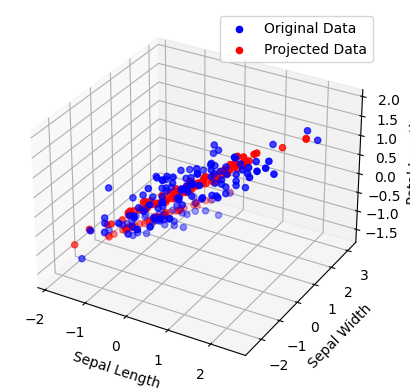

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

# Plot the original data and the projected data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['sepal_length'], data['sepal_width'], data['petal_length'], c='blue', label='Original Data')
ax.scatter(projected_data[:, 0], projected_data[:, 1], projected_data[:, 2], c='red', label='Projected Data')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.legend()
plt.show()


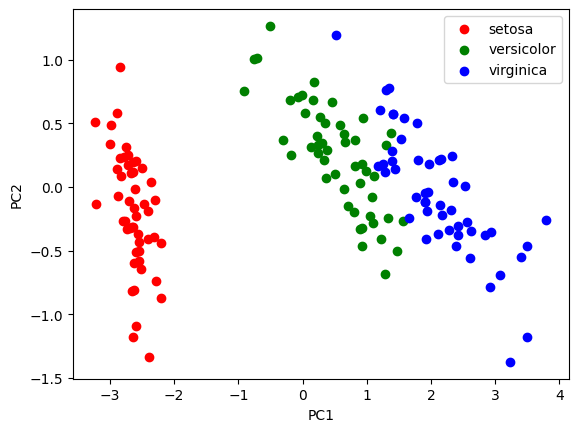

In [63]:
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target_names[iris.target]

# Separate the features and labels
X = data.iloc[:, :-1].values
y = data['species'].values

# Dictionary to map class labels to colors
colors = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}

# Center the data
X_centered = X - X.mean(axis=0)

# SVD
U, s, Vt = np.linalg.svd(X_centered)

# PCA
pc1 = Vt.T[:, 0]
pc2 = Vt.T[:, 1]

# Project the data onto the first two principal components
X_proj = X_centered.dot(np.vstack((pc1, pc2)).T)

# Plot the data
fig, ax = plt.subplots()
for species in np.unique(y):
    ix = np.where(y == species)
    ax.scatter(X_proj[ix, 0], X_proj[ix, 1], c=colors[species], label=species)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.legend()
plt.show()
